# Comparaison masques TM fichiers initiaux et nouvelle grille recalculée

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-04-01T07:07:22.308213+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt
import glob

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [3]:
#pip install cdo

In [4]:
import cdo

In [5]:
%watermark --iversions

xesmf     : 0.8.8
pandas    : 2.2.3
numpy     : 2.0.2
watermark : 2.5.0
cdo       : 1.6.1
xarray    : 2025.1.1
matplotlib: 3.10.0



## Test pour un modèle

### Initial

#### Sftlf

In [6]:
path_sftlf_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_sftlf/", "sftlf_BCC-CSM2-MR.nc")

In [7]:
sftlf_BCC_CSM2 = xr.open_dataset(path_sftlf_BCC_CSM2)
sftlf_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftlf     (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Wed Sep 04 19:44:19 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

In [8]:
sftlf = sftlf_BCC_CSM2["sftlf"]

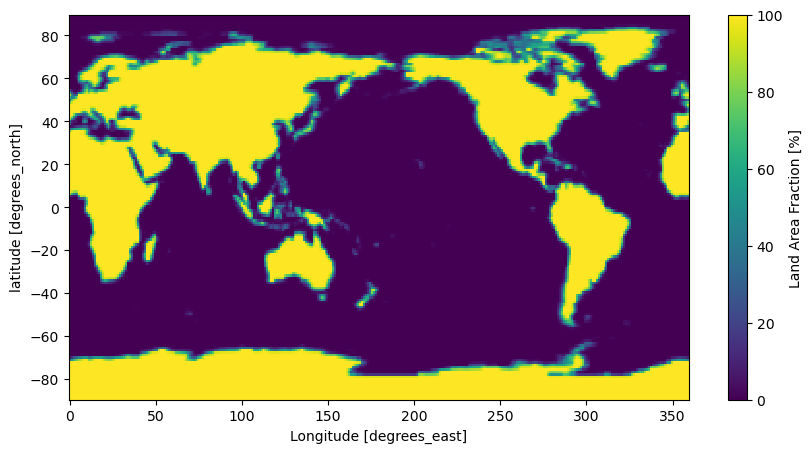

In [9]:
plt.figure(figsize=(10, 5))
sftlf_BCC_CSM2["sftlf"].plot()

In [10]:
frac_sftlf = (sftlf_BCC_CSM2["sftlf"]) / 100
frac_sftlf

<xarray.DataArray 'sftlf' (lat: 160, lon: 320)> Size: 205kB
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14

#### Sftgif

In [11]:
path_sftgif_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_sftgif/", "sftgif_BCC-CSM2-MR.nc")

In [12]:
sftgif_BCC_CSM2 = xr.open_dataset(path_sftgif_BCC_CSM2)
sftgif_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftgif    (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Tue Sep 03 22:30:58 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

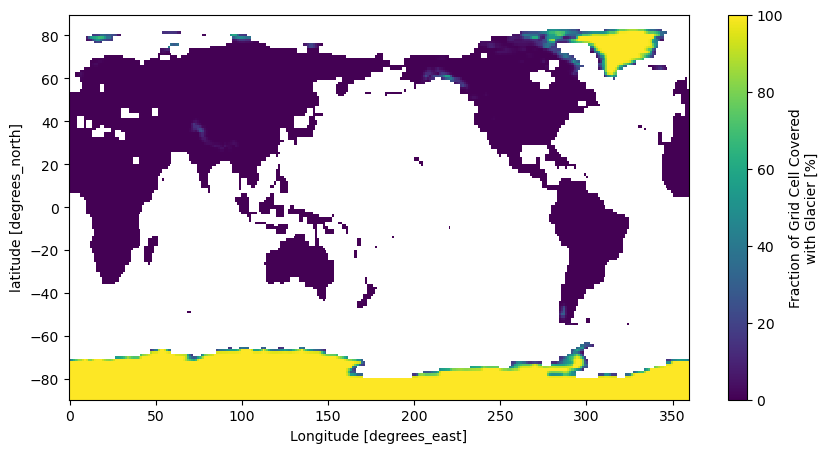

In [13]:
plt.figure(figsize=(10, 5))
sftgif_BCC_CSM2["sftgif"].plot()

#### Difference

In [14]:
diff = sftlf_BCC_CSM2["sftlf"] - sftgif_BCC_CSM2["sftgif"]
diff

<xarray.DataArray (lat: 160, lon: 320)> Size: 205kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14

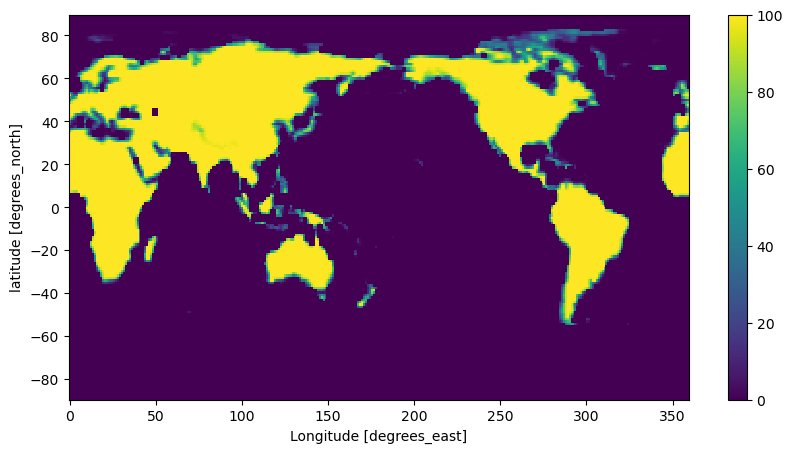

In [15]:
plt.figure(figsize=(10, 5))
diff= diff.where(diff >= 0, 0)
diff.plot()

### Regrid

#### Sftlf

In [16]:
path_regrid_sftlf_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/interp_sftlf/", "BCC-CSM2-MR_sftlf_reprojete.nc")

In [17]:
regrid_sftlf_BCC_CSM2 = xr.open_dataset(path_regrid_sftlf_BCC_CSM2)
regrid_sftlf_BCC_CSM2

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftlf    (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  bilinear

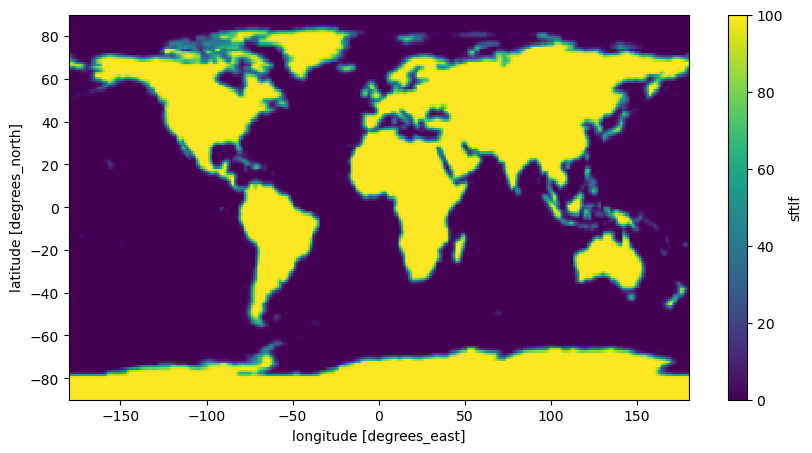

In [18]:
plt.figure(figsize=(10, 5))
regrid_sftlf_BCC_CSM2["sftlf"].plot()

#### Sftgif

In [19]:
path_regrid_sftgif_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/interp_sftgif/", "BCC-CSM2-MR_sftgif_reprojete.nc")

In [20]:
regrid_sftgif_BCC_CSM2 = xr.open_dataset(path_regrid_sftgif_BCC_CSM2)
regrid_sftgif_BCC_CSM2

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftgif   (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  bilinear

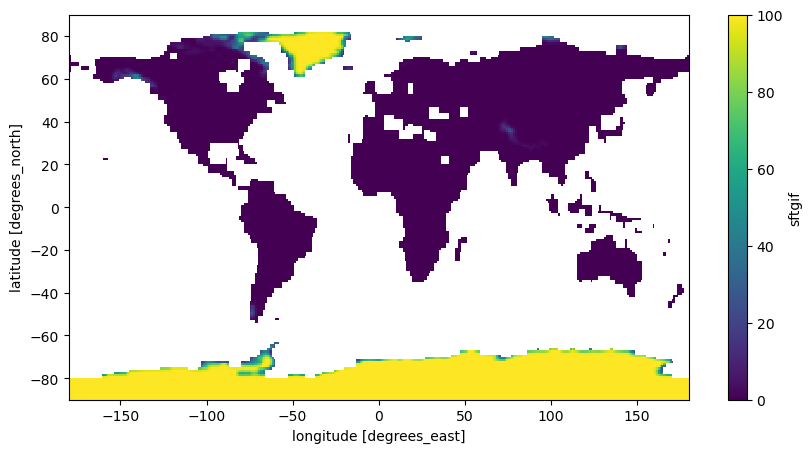

In [21]:
plt.figure(figsize=(10, 5))
regrid_sftgif_BCC_CSM2["sftgif"].plot()

#### Difference

In [22]:
diff_regrid = regrid_sftlf_BCC_CSM2["sftlf"] - regrid_sftgif_BCC_CSM2["sftgif"]
diff_regrid= diff_regrid.where(diff_regrid >= 0, 0)
diff_regrid

<xarray.DataArray (lat: 180, lon: 360)> Size: 259kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

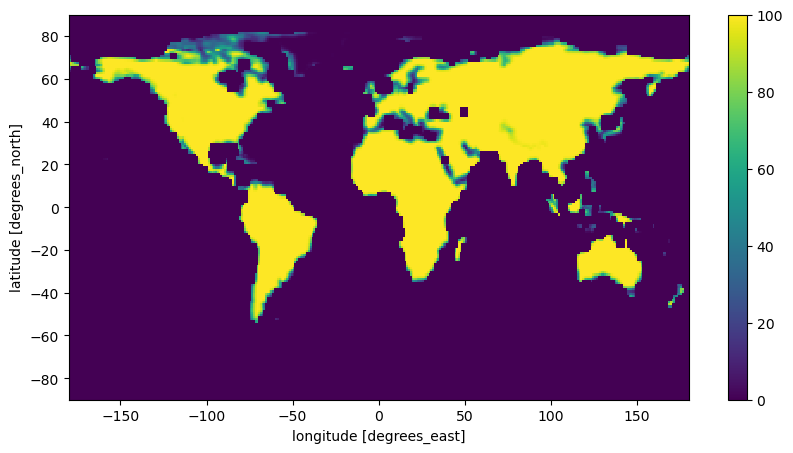

In [23]:
plt.figure(figsize=(10, 5))
diff_regrid.plot()

### Calcul superficie fichier initial

#### Areacella

In [24]:
path_areacella_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_areacella/", "areacella_BCC-CSM2-MR.nc")

areacella_BCC_CSM2 = xr.open_dataset(path_areacella_BCC_CSM2)
areacella_BCC_CSM2

<xarray.Dataset> Size: 412kB
Dimensions:    (lon: 320, lat: 160)
Coordinates:
  * lon        (lon) float32 1kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
  * lat        (lat) float32 640B -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Data variables:
    areacella  (lat, lon) float64 410kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...
    history:      Sat Dec 21 01:26:42 2019: ncrename -O --variable cell_area,...

In [25]:
cell_area = areacella_BCC_CSM2["areacella"]

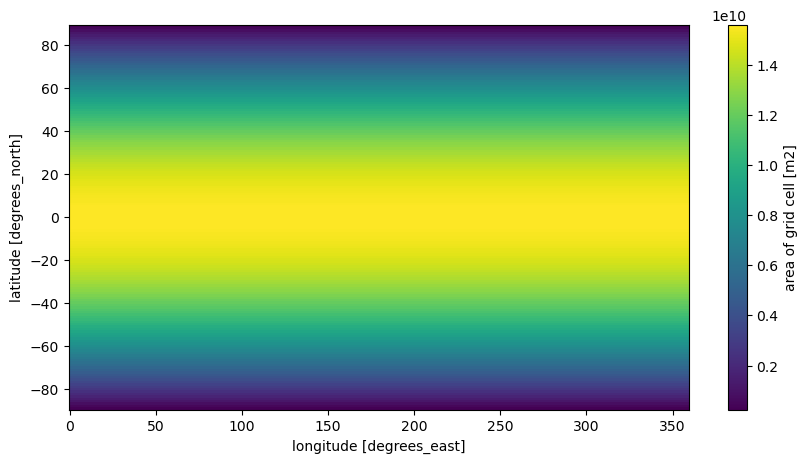

In [26]:
plt.figure(figsize=(10, 5))
cell_area.plot()

#### Pour sftlf

In [27]:
print(sftlf.min().item(), sftlf.max().item(), sftlf.mean().item())
print(sftlf)

0.0 100.0 33.87080383300781
<xarray.DataArray 'sftlf' (lat: 160, lon: 320)> Size: 205kB
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
Attributes:
    standard_name:     land_area_fraction
    long_name:         Land Area Fraction
    units:             %
    grid_type:         gaussian
    online_operation:  once
    cell_methods:      area: mean
    description:       Land Area Fraction
    history:           none


In [28]:
diff_lat = np.abs(sftlf['lat'].values - cell_area['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat))

Écart maximum entre les latitudes : 3.430957036698601e-06


In [29]:
print("Valeur minimale de sftlf :", sftlf.min().item())
print("Valeur maximale de sftlf :", sftlf.max().item())
print("Moyenne de sftlf :", sftlf.mean().item())

Valeur minimale de sftlf : 0.0
Valeur maximale de sftlf : 100.0
Moyenne de sftlf : 33.87080383300781


In [30]:
print(sftlf.shape, cell_area.shape)
print("Coordonnées égales ?", np.array_equal(sftlf['lat'], cell_area['lat']))

(160, 320) (160, 320)
Coordonnées égales ? False


In [31]:
# comme les lat sont pas exactement les mêmes sur les deux fichiers, il faut interpoler pour faire le calcul
sftlf_aligned = sftlf.interp(lat=cell_area['lat'], lon=cell_area['lon'], method='nearest')

In [32]:
surface_totale = (sftlf_aligned / 100) * (cell_area * 1e-6)
superficie_terrestre = surface_totale.sum().item()

print(f"Superficie terrestre totale calculée : {superficie_terrestre:.2e} km²")

Superficie terrestre totale calculée : 1.49e+08 km²


#### Pour diff (sans Antarc + Greenl)

In [33]:
diff_lat_diff = np.abs(diff['lat'].values - cell_area['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_diff))

Écart maximum entre les latitudes : 3.430957036698601e-06


In [34]:
diff_aligned = diff.interp(lat=cell_area['lat'], lon=cell_area['lon'], method='nearest')

In [35]:
print("Valeur minimale de diff :", diff.min().item())
print("Valeur maximale de diff :", diff.max().item())
print("Moyenne de diff :", diff.mean().item())

Valeur minimale de diff : 0.0
Valeur maximale de diff : 100.0
Moyenne de diff : 22.006332397460938


In [36]:
surface_wo_AG = (diff_aligned / 100) * (cell_area * 1e-6)
superficie_wo_AG = surface_wo_AG.sum().item()

print(f"Superficie terrestre wo AG calculée : {superficie_wo_AG:.2e} km²")

Superficie terrestre wo AG calculée : 1.28e+08 km²


### Calcul superficie fichier nouvelle grille

#### Areacella sftlf

In [37]:
# Calcul de la nouvelle grille d'aires, à partir du fichier regriddé (sftlf)
#os.system('cdo gridarea ~/private-storage/interp_sftlf/BCC-CSM2-MR_sftlf_reprojete.nc ~/private-storage/cell_area_recalcule/cell_area_reprojete_BCC_CSM2_sftlf.nc')

In [38]:
path_areacella_recalcule_BCC_CSM2_sftlf = os.path.join("~/private-storage/cell_area_recalcule/", "cell_area_reprojete_BCC_CSM2_sftlf.nc")

areacella_recalcule_BCC_CSM2_sftlf = xr.open_dataset(path_areacella_recalcule_BCC_CSM2_sftlf)

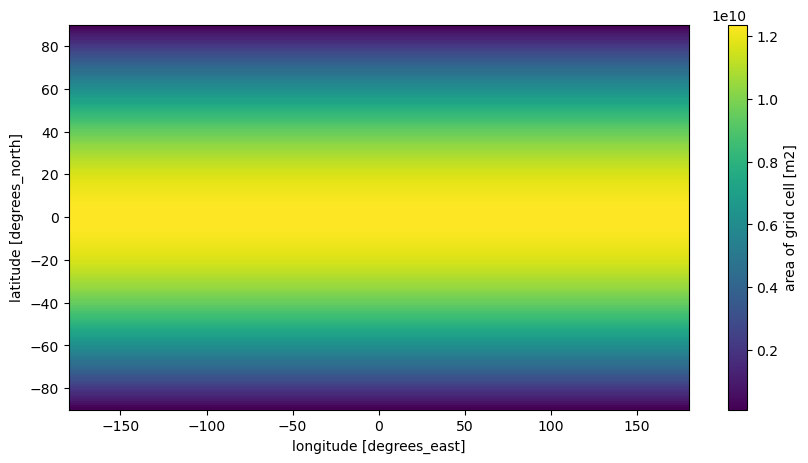

In [39]:
cell_area_recalcule_sftlf = areacella_recalcule_BCC_CSM2_sftlf["cell_area"]

plt.figure(figsize=(10, 5))
cell_area_recalcule_sftlf.plot()

#### Areacella sftgif

In [40]:
# Calcul de la nouvelle grille d'aires, à partir du fichier regriddé (sftgif)
#os.system('cdo gridarea ~/private-storage/interp_sftgif/BCC-CSM2-MR_sftgif_reprojete.nc ~/private-storage/cell_area_recalcule/cell_area_reprojete_BCC_CSM2_sftgif.nc')

In [41]:
path_areacella_recalcule_BCC_CSM2_sftgif = os.path.join("~/private-storage/cell_area_recalcule/", "cell_area_reprojete_BCC_CSM2_sftgif.nc")

areacella_recalcule_BCC_CSM2_sftgif = xr.open_dataset(path_areacella_recalcule_BCC_CSM2_sftgif)

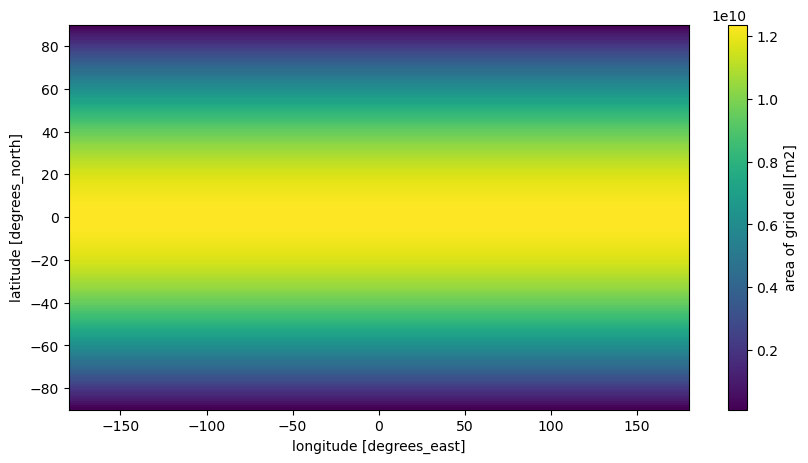

In [42]:
cell_area_recalcule_sftgif = areacella_recalcule_BCC_CSM2_sftgif["cell_area"]

plt.figure(figsize=(10, 5))
cell_area_recalcule_sftgif.plot()

### Superficie continentale

#### Pour sftlf

In [43]:
sftlf_regrid = regrid_sftlf_BCC_CSM2["sftlf"]

In [44]:
print(sftlf_regrid.min().item(), sftlf_regrid.max().item(), sftlf_regrid.mean().item())
print(sftlf_regrid)

0.0 100.0 33.91508483886719
<xarray.DataArray 'sftlf' (lat: 180, lon: 360)> Size: 259kB
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5


In [45]:
diff_lat_regrid = np.abs(sftlf_regrid['lat'].values - cell_area_recalcule_sftlf['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_regrid))

Écart maximum entre les latitudes : 0.0


In [46]:
print("Valeur minimale de sftlf_regrid :", sftlf_regrid.min().item())
print("Valeur maximale de sftlf_regrid :", sftlf_regrid.max().item())
print("Moyenne de sftlf_regrid :", sftlf_regrid.mean().item())

Valeur minimale de sftlf_regrid : 0.0
Valeur maximale de sftlf_regrid : 100.0
Moyenne de sftlf_regrid : 33.91508483886719


In [47]:
surface_totale_regrid = (sftlf_regrid / 100) * (cell_area_recalcule_sftlf * 1e-6)
superficie_terrestre_regrid = surface_totale_regrid.sum().item()

print(f"Superficie continentale totale calculée nouvelle grille : {superficie_terrestre_regrid:.2e} km²")

Superficie continentale totale calculée nouvelle grille : 1.49e+08 km²


#### Pour diff (sans Antarc + Greenl)

In [48]:
diff_lat_diff_regrid = np.abs(diff_regrid['lat'].values - cell_area_recalcule_sftgif['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_diff_regrid))

Écart maximum entre les latitudes : 0.0


Valeur minimale de diff_regrid : 0.0
Valeur maximale de diff_regrid : 100.0
Moyenne de diff_regrid : 20.887954711914062


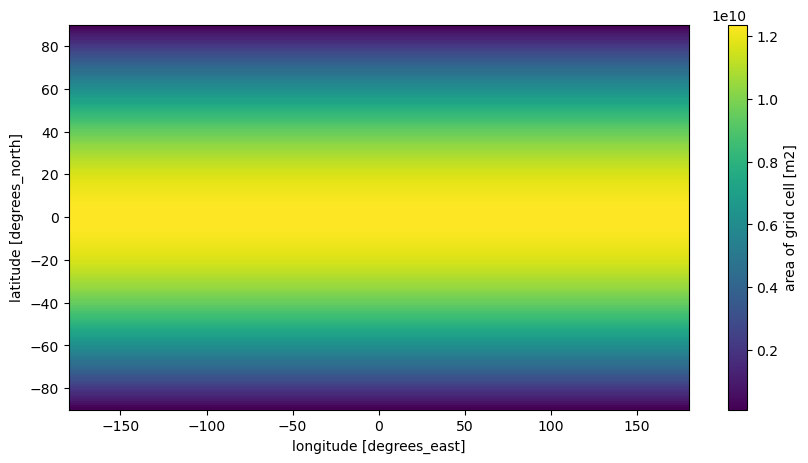

In [49]:
print("Valeur minimale de diff_regrid :", diff_regrid.min().item())
print("Valeur maximale de diff_regrid :", diff_regrid.max().item())
print("Moyenne de diff_regrid :", diff_regrid.mean().item())

plt.figure(figsize=(10, 5))
cell_area_recalcule_sftlf.plot()

In [50]:
surface_wo_AG_regrid = (diff_regrid / 100) * (cell_area_recalcule_sftgif * 1e-6)
superficie_wo_AG_regrid = surface_wo_AG_regrid.sum().item()

print(f"Superficie terrestre wo AG calculée : {superficie_wo_AG_regrid:.2e} km²")

Superficie terrestre wo AG calculée : 1.22e+08 km²


### Differences superficie initial / regrid

In [51]:
diff_superficie_totale = superficie_terrestre_regrid - superficie_terrestre
print(diff_superficie_totale)

-4288.162453740835


In [52]:
diff_superficie_wo_AG = superficie_wo_AG_regrid - superficie_wo_AG
print(diff_superficie_wo_AG)

-6334183.520876676


## Test pour un autre modèle

### Initial

#### Sftlf

In [53]:
path_sftlf_CanESM5 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_sftlf/", "sftlf_CanESM5.nc")

sftlf_CanESM5 = xr.open_dataset(path_sftlf_CanESM5)
sftlf_CanESM5

<xarray.Dataset> Size: 37kB
Dimensions:   (lon: 128, bnds: 2, lat: 64)
Coordinates:
  * lon       (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lat       (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 2kB ...
    lat_bnds  (lat, bnds) float64 1kB ...
    sftlf     (lat, lon) float32 33kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Wed Sep 04 19:44:42 2019: cdo remapbil,grid_CanES...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

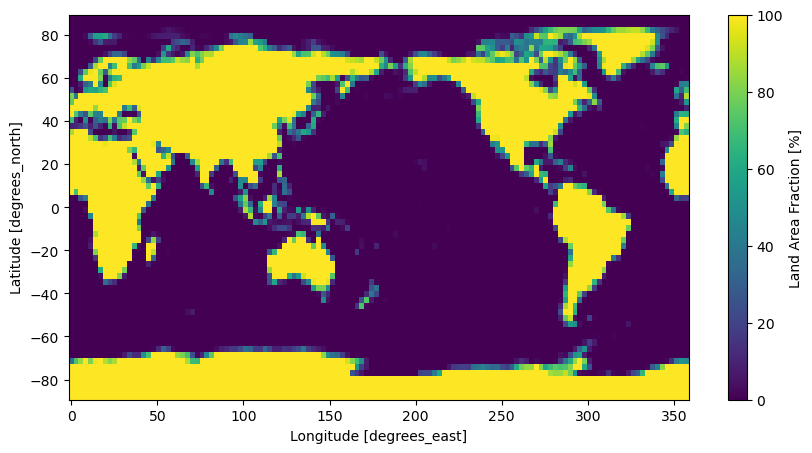

In [54]:
plt.figure(figsize=(10, 5))
sftlf_CanESM5["sftlf"].plot()

In [55]:
sftlf_only = sftlf_CanESM5["sftlf"]
sftlf_only

<xarray.DataArray 'sftlf' (lat: 64, lon: 128)> Size: 33kB
[8192 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Attributes:
    standard_name:     land_area_fraction
    long_name:         Land Area Fraction
    units:             %
    grid_type:         gaussian
    online_operation:  once
    cell_methods:      area: mean
    description:       Land Area Fraction
    history:           none

#### Sftgif

In [56]:
path_sftgif_CanESM5 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_sftgif/", "sftgif_CanESM5.nc")

sftgif_CanESM5 = xr.open_dataset(path_sftgif_CanESM5)
sftgif_CanESM5

<xarray.Dataset> Size: 37kB
Dimensions:   (lon: 128, bnds: 2, lat: 64)
Coordinates:
  * lon       (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lat       (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 2kB ...
    lat_bnds  (lat, bnds) float64 1kB ...
    sftgif    (lat, lon) float32 33kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Tue Sep 03 22:27:56 2019: cdo remapbil,grid_CanES...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

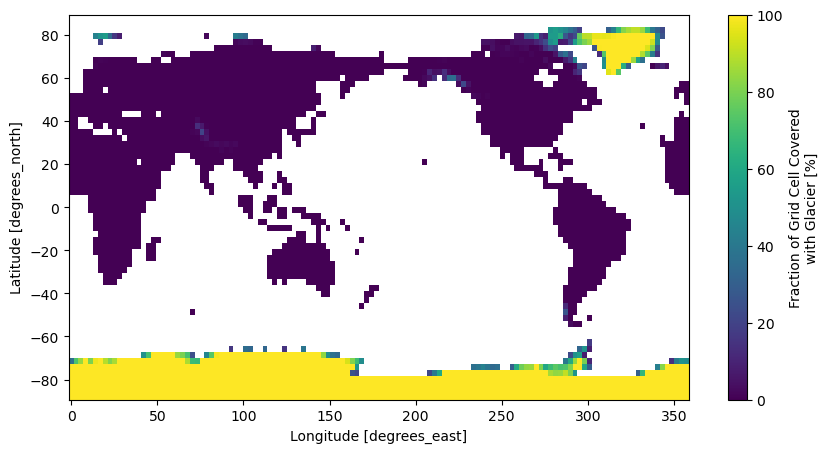

In [57]:
plt.figure(figsize=(10, 5))
sftgif_CanESM5["sftgif"].plot()

#### Difference

In [58]:
diff_CanESM5 = sftlf_CanESM5["sftlf"] - sftgif_CanESM5["sftgif"]
diff_CanESM5

<xarray.DataArray (lat: 64, lon: 128)> Size: 33kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86

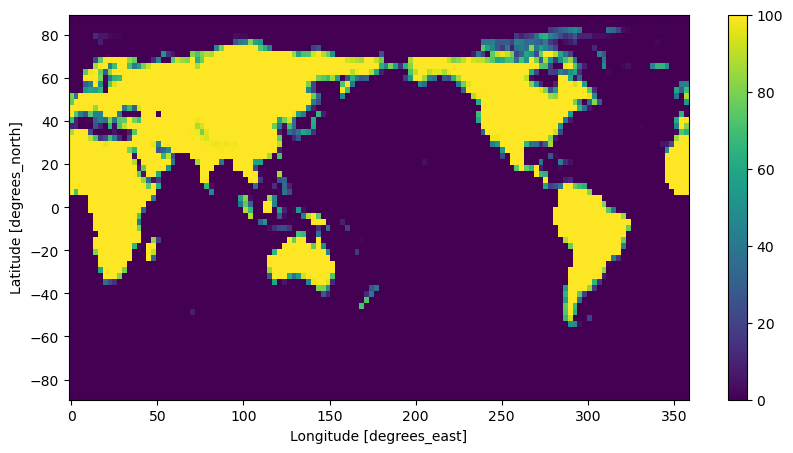

In [59]:
plt.figure(figsize=(10, 5))
diff_CanESM5 = diff_CanESM5.where(diff_CanESM5 >= 0, 0)
diff_CanESM5.plot()

### Regrid

#### Sftlf

In [60]:
path_regrid_sftlf_CanESM5 = os.path.join("/home/jovyan/private-storage/interp_sftlf/", "CanESM5_sftlf_reprojete.nc")

regrid_sftlf_CanESM5 = xr.open_dataset(path_regrid_sftlf_CanESM5)
regrid_sftlf_CanESM5

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
    type     |S4 4B ...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftlf    (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  bilinear

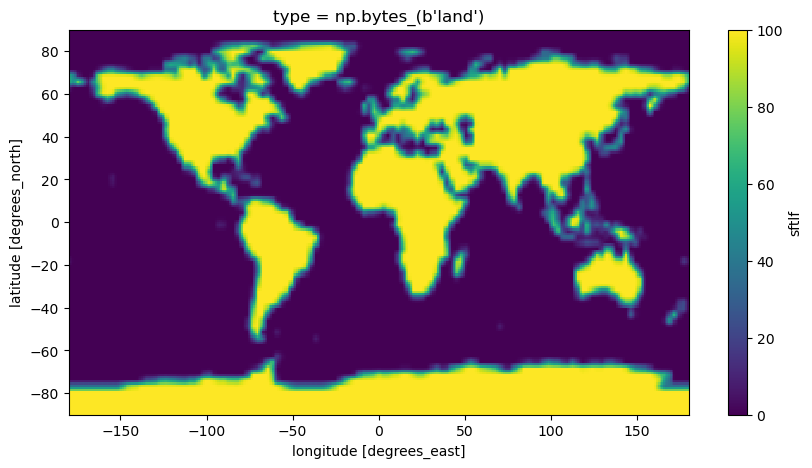

In [61]:
plt.figure(figsize=(10, 5))
regrid_sftlf_CanESM5["sftlf"].plot()

#### Sftgif

In [62]:
path_regrid_sftgif_CanESM5 = os.path.join("/home/jovyan/private-storage/interp_sftgif/", "CanESM5_sftgif_reprojete.nc")

regrid_sftgif_CanESM5 = xr.open_dataset(path_regrid_sftgif_CanESM5)
regrid_sftgif_CanESM5

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftgif   (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  bilinear

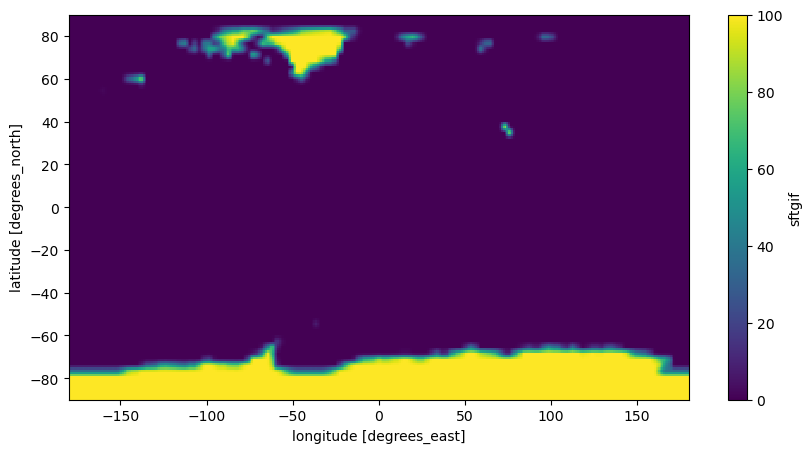

In [63]:
plt.figure(figsize=(10, 5))
regrid_sftgif_CanESM5["sftgif"].plot()

#### Difference

In [64]:
diff_regrid_CanESM5 = regrid_sftlf_CanESM5["sftlf"] - regrid_sftgif_CanESM5["sftgif"]
diff_regrid_CanESM5

<xarray.DataArray (lat: 180, lon: 360)> Size: 259kB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    type     |S4 4B ...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

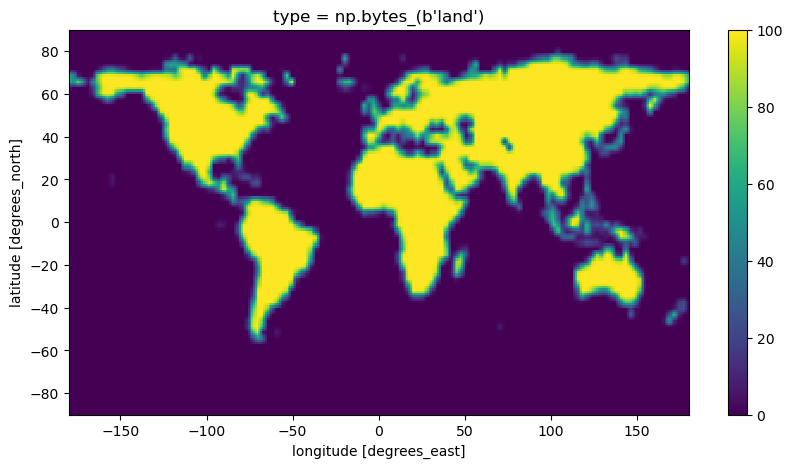

In [65]:
plt.figure(figsize=(10, 5))
diff_regrid_CanESM5 = diff_regrid_CanESM5.where(diff_regrid_CanESM5 >= 0, 0)
diff_regrid_CanESM5.plot()

### Calcul superficie fichier initial

#### Areacella

In [66]:
path_areacella_CanESM5 = os.path.join("/home/jovyan/private-storage/masques/masques/areacella/", "areacella_CanESM5.nc")

areacella_CanESM5 = xr.open_dataset(path_areacella_CanESM5)
areacella_CanESM5

<xarray.Dataset> Size: 37kB
Dimensions:    (lat: 64, bnds: 2, lon: 128)
Coordinates:
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    areacella  (lat, lon) float32 33kB ...
Attributes: (12/52)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-1ppy
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/75ee2e71-245d-44fb-bc70-b12c0ec...
    variable_id:                 areacella
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

In [71]:
cell_area_CanESM5 = areacella_CanESM5["areacella"]

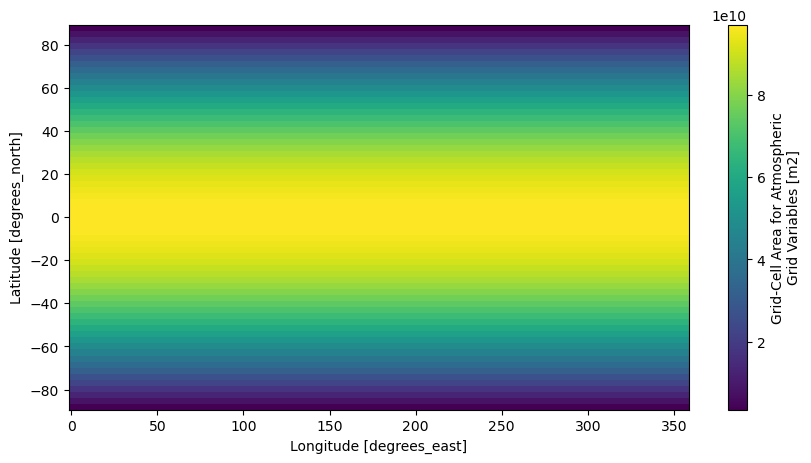

In [67]:
plt.figure(figsize=(10, 5))
areacella_CanESM5["areacella"].plot()

#### Sftlf

In [68]:
print(sftlf_only.min().item(), sftlf_only.max().item(), sftlf_only.mean().item())
print(sftlf_only)

0.0 100.0 33.831520080566406
<xarray.DataArray 'sftlf' (lat: 64, lon: 128)> Size: 33kB
array([[100.      , 100.      , 100.      , ..., 100.      , 100.      ,
        100.      ],
       [100.      , 100.      , 100.      , ..., 100.      , 100.      ,
        100.      ],
       [100.      , 100.      , 100.      , ..., 100.      , 100.      ,
        100.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   4.980532,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Attributes:
    standard_name:     land_area_fraction
    long_name:         Land Area Fraction
    units:             %
    grid_type:         gau

In [72]:
diff_lat_CanESM5 = np.abs(sftlf_only['lat'].values - cell_area_CanESM5['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_CanESM5))

Écart maximum entre les latitudes : 4.788635976638034e-08


In [73]:
print("Valeur minimale de sftlf :", sftlf_only.min().item())
print("Valeur maximale de sftlf :", sftlf_only.max().item())
print("Moyenne de sftlf :", sftlf_only.mean().item())

Valeur minimale de sftlf : 0.0
Valeur maximale de sftlf : 100.0
Moyenne de sftlf : 33.831520080566406


In [74]:
print(sftlf_only.shape, cell_area_CanESM5.shape)
print("Coordonnées égales ?", np.array_equal(sftlf_only['lat'], cell_area_CanESM5['lat']))

(64, 128) (64, 128)
Coordonnées égales ? False


In [75]:
# comme les lat sont pas exactement les mêmes sur les deux fichiers, il faut interpoler pour faire le calcul
sftlf_aligned_CanESM5 = sftlf_only.interp(lat=cell_area_CanESM5['lat'], lon=cell_area_CanESM5['lon'], method='nearest')

In [77]:
surface_cont_CanESM5 = (sftlf_aligned_CanESM5 / 100) * (cell_area_CanESM5 * 1e-6)
superficie_cont_CanESM5 = surface_cont_CanESM5.sum().item()

print(f"Superficie continentale totale calculée : {superficie_cont_CanESM5:.2e} km²")

Superficie continentale totale calculée : 1.48e+08 km²


#### Pour diff (sans Antarc + Greenl)

In [78]:
diff_lat_diff_CanESM5 = np.abs(diff_CanESM5['lat'].values - cell_area_CanESM5['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_diff_CanESM5))

Écart maximum entre les latitudes : 4.788635976638034e-08


In [79]:
diff_aligned_CanESM5 = diff_CanESM5.interp(lat=cell_area_CanESM5['lat'], lon=cell_area_CanESM5['lon'], method='nearest')

In [80]:
print("Valeur minimale de diff :", diff_CanESM5.min().item())
print("Valeur maximale de diff :", diff_CanESM5.max().item())
print("Moyenne de diff :", diff_CanESM5.mean().item())

Valeur minimale de diff : 0.0
Valeur maximale de diff : 100.0
Moyenne de diff : 22.077348709106445


In [81]:
surface_wo_AG_CanESM5 = (diff_aligned_CanESM5 / 100) * (cell_area_CanESM5 * 1e-6)
superficie_wo_AG_CanESM5 = surface_wo_AG_CanESM5.sum().item()

print(f"Superficie terrestre wo AG calculée : {superficie_wo_AG_CanESM5:.2e} km²")

Superficie terrestre wo AG calculée : 1.28e+08 km²


### Calcul superficie nouvelle grille

#### Areacella sftlf

In [82]:
# Calcul de la nouvelle grille d'aires, à partir du fichier regriddé (sftlf) ! à run une seule fois
#os.system('cdo gridarea ~/private-storage/interp_sftlf/CanESM5_sftlf_reprojete.nc ~/private-storage/cell_area_recalcule/cell_area_reprojete_CanESM5_sftlf.nc')

cdo    gridarea: Processed 1 variable [0.10s 49MB].


Warning (cdf_set_dimtype): Could not assign all character coordinates to data variable!


0

In [83]:
path_areacella_recalcule_CanESM5_sftlf = os.path.join("~/private-storage/cell_area_recalcule/", "cell_area_reprojete_CanESM5_sftlf.nc")

areacella_recalcule_CanESM5_sftlf = xr.open_dataset(path_areacella_recalcule_CanESM5_sftlf)

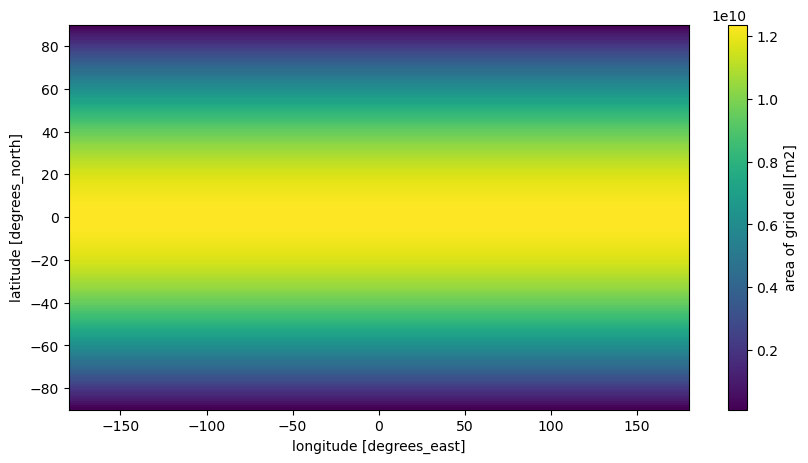

In [84]:
cell_area_recalcule_sftlf_CanESM5 = areacella_recalcule_CanESM5_sftlf["cell_area"]

plt.figure(figsize=(10, 5))
cell_area_recalcule_sftlf_CanESM5.plot()

#### Areacella stfgif

In [85]:
# Calcul de la nouvelle grille d'aires, à partir du fichier regriddé (sftlf) ! à run une seule fois
#os.system('cdo gridarea ~/private-storage/interp_sftgif/CanESM5_sftgif_reprojete.nc ~/private-storage/cell_area_recalcule/cell_area_reprojete_CanESM5_sftgif.nc')

cdo    gridarea: Processed 1 variable [0.06s 48MB].


0

In [86]:
path_areacella_recalcule_CanESM5_sftgif = os.path.join("~/private-storage/cell_area_recalcule/", "cell_area_reprojete_CanESM5_sftgif.nc")

areacella_recalcule_CanESM5_sftgif = xr.open_dataset(path_areacella_recalcule_CanESM5_sftgif)

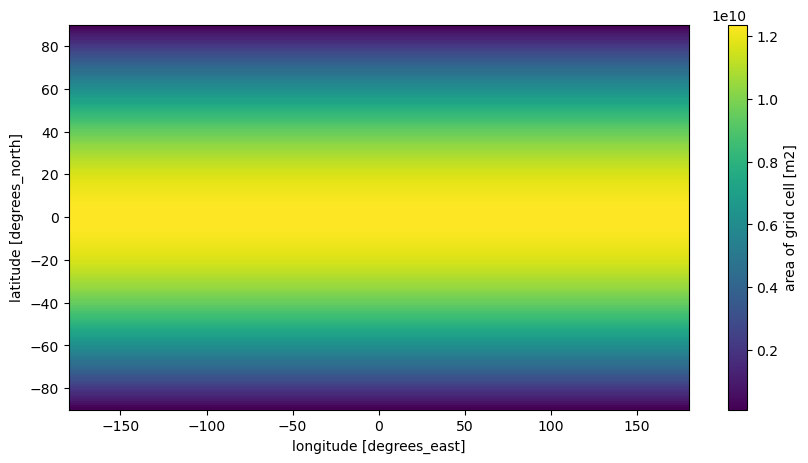

In [87]:
cell_area_recalcule_sftgif_CanESM5 = areacella_recalcule_CanESM5_sftgif["cell_area"]

plt.figure(figsize=(10, 5))
cell_area_recalcule_sftgif_CanESM5.plot()

#### Superficie continentale

In [89]:
surface_cont_regrid_CanESM5 = (regrid_sftlf_CanESM5["sftlf"] / 100) * (cell_area_recalcule_sftlf_CanESM5 * 1e-6)
superficie_cont_regrid_CanESM5 = surface_cont_regrid_CanESM5.sum().item()

print(f"Superficie continentale totale calculée nouvelle grille : {superficie_cont_regrid_CanESM5:.2e} km²")

Superficie continentale totale calculée nouvelle grille : 1.47e+08 km²


#### Superficie continentale wo AG

In [90]:
surface_wo_AG_regrid_CanESM5 = (diff_regrid_CanESM5 / 100) * (cell_area_recalcule_sftgif_CanESM5 * 1e-6)
superficie_wo_AG_regrid_CanESM5 = surface_wo_AG_regrid_CanESM5.sum().item()

print(f"Superficie terrestre wo AG calculée : {superficie_wo_AG_regrid_CanESM5:.2e} km²")

Superficie terrestre wo AG calculée : 1.30e+08 km²


### Differences superficie initial / regrid

In [91]:
diff_superficie_totale_CanESM5 = superficie_cont_regrid_CanESM5 - superficie_cont_CanESM5
print(diff_superficie_totale_CanESM5)

-1259360.1639964879


In [ ]:
diff_superficie_wo_AG_CanESM5 = superficie_wo_AG_regrid_CanESM5 - superficie_wo_AG_CanESM5
print(diff_superficie_wo_AG_CanESM5)